# 1-Dimensional Gaussian Mixture Models (GMMs)

__Objective__:

Today our goal is to use a hands-on approach to help us become more familiar with gaussians. We'll turn the 1-dimensional gaussian equations in lecture __23 Breaking K-Means, Meeting EM__ into Python code, using Numpy and Matplotlib to visualize gaussians and probabilities. It will be helpful to have these slides open while you complete today's challenge.

## Part 1: 1-Dimensional Gaussian

### 1.A: The Gaussian Curve
Let's get a feel for how the mean and standard deviation shape a __gaussian__ curve (a.k.a. __normal distribution__, a.k.a. __bell curve__) in 1D. 

In a 1D gaussian curve, the X axis describes possible values $x$, and the Y axis describes the probability $p(x)$ of seeing each possible $x$ value.

__TO DO:__

1. Complete the `gauss_1D()` function below so that it calculates the probability of each value in X, using the equation from slide 39 (copied below). You'll know that your `gauss_1D()` is working when `test_gauss_1D()` draws a bell curve (see slide 39 for an example). 
> $p(x) = \frac{1}{\sqrt{2 \pi \sigma}} \exp(\frac{-(x-\mu)^2}{2 \sigma^2})$

2. Call your completed `gauss_1D()` function to find the probabilities of the samples at $\pm0$, $\pm1$, $\pm2$, and $\pm3$ standard deviations from the mean. Superimpose them on the graph of $p(x)$.

2. Add to `test_gauss_1D()` so that it visualizes a few more gaussians on the same axes. Play with the mean and variance until you have a feel for how they shape the curve (probability distribution).

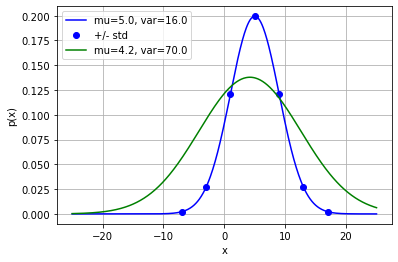

In [91]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

def gauss_1D( X, mu, var ):
    ''' Returns the probability of each value in the 1-dimensional dataset X, 
    given the scalar shape parameters mu (the mean) and var (the variance).'''
    
    # TODO: replace this with the real thing
    #P = np.zeros((X.shape))

    coeff = 1 / (2 * np.pi * var**0.5)**0.5
    exponent = -(X - mu)**2 / (2 * var)
    P = coeff * np.exp(exponent)

    return P


def test_gauss_1D( ):

    # test dataset 
    N = 501         # 501 samples
    M = 1           # 1-dimensional
    X = np.linspace(-25, 25, N).reshape((N,M))

    # the shape parameters of our first gaussian
    mu = 5.0
    var = 4**2

    # let's see it!
    P = gauss_1D( X, mu, var )

    # If there is no axis already, create a new one
    fig, ax = plt.subplots()
    ax.set_xlabel("x")
    ax.set_ylabel("p(x)")
    ax.grid(True)
    ax.plot( X, P, '-b', label="mu={0:.1f}, var={1:.1f}".format(mu, var))

    # Let's highlight some key points at +/-0, 1, 2, and 3 stds from the mean
    x_std = np.array([[-3, -2, -1, 0, 1, 2, 3]]).T * var**0.5 + mu
    p_std = gauss_1D(x_std, mu, var)
    ax.plot( x_std, p_std, 'ob', label="+/- std")


    # Try it out with a few different shape parameters
    mu = 4.20
    var = 70
    P = gauss_1D( X, mu, var )
    ax.plot( X, P, '-g', label="mu={0:.1f}, var={1:.1f}".format(mu, var))


    # Make sure the figure is displayed with a legend
    ax.legend()
    plt.show()

test_gauss_1D()

### 1.B: Calculating Mean and Variance from 1D Data
Now let's see how to fit a gaussian curve to normally distributed 1-dimensional data.

The cell below already does the following for you:
1. Uses `np.random.normal()` to generate a normally distributed dataset.
2. Visualizes the randomly generated data with a __scatter__ plot and superimposed the gaussian curve.
3. Visualizes the randomly generated data with a __histogram__ and superimposed the gaussian curve.

__To do:__

We know the mean and variance that we provided as input to `normal()`. How close did `normal()` get? 

1. Print the observed mean and variance of the generated dataset alongside the mean and variance you provided as input. 
2. Use your gauss_1D to calculate the gaussian distribution using your observed mean and variance. 
3. Superimpose the observed distribution on your scatter plot and histogram.
4. Run this code cell a few times to see how the results change depending on the randomly generated data.

Mu observed: [5.467]
Variance observed: [13.331]


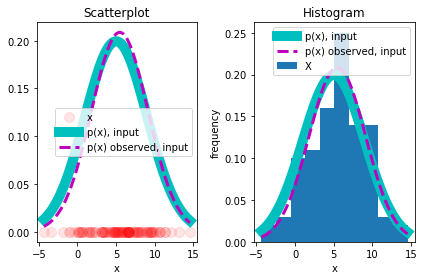

In [92]:
# Shape parameters used to generate the random data
mu_true = 5.0
std_true = 4.0
var_true = std_true**2

# Randomly generated data
N = 100
M = 1
X = np.random.normal(mu_true, std_true, (N,M))

# Scatterplot
fig, ax = plt.subplots(1,2)
ax[0].set_title("Scatterplot")
ax[0].set_xlabel("x")
ax[0].plot(X,np.zeros((N,M)),'ro', markersize=10, alpha=0.1, label="x")
X_linspace = np.linspace( np.min(X), np.max(X), N)
P_linspace = gauss_1D(X_linspace, mu_true, var_true)
ax[0].plot(X_linspace, P_linspace, '-c', linewidth=10, label="p(x), input")

# Histogram
ax[1].set_title("Histogram")
ax[1].set_xlabel("x")
ax[1].set_ylabel("frequency")
ax[1].hist(X, weights=np.ones(X.shape)/N, label="X")
ax[1].plot(X_linspace, P_linspace, '-c', linewidth=10, label="p(x), input")

# Observed mean and variance of randomly generated data
X_mu = np.mean(X, axis = 0)
X_var = np.var(X, axis = 0)
print('Mu observed:', X_mu)
print('Variance observed:', X_var)

# Visualize observed distributions alongside requested distributions (using inputted mean and std)
P_observed = gauss_1D(X_linspace, X_mu, X_var)
ax[0].plot(X_linspace, P_observed, '--m', linewidth=3, label="p(x) observed, input")
ax[1].plot(X_linspace, P_observed, '--m', linewidth=3, label="p(x) observed, input")

ax[0].legend()
ax[1].legend()
fig.tight_layout()
plt.show()

## Part 2: 1-D Gaussian Mixture Model

### 2.A: Cumulative Probability

The code cell below generates a dataset using 2 gaussians whose bell curves overlap. Let's see how the presence of a second gaussian impacts the probability of a sample, $x_n$.

__To do__:

1. Visualize the probability of each sample $x_n$ appearing in each gaussian distribution $\mathcal{N}(\mu_k, \sigma_k)$, as calculated in `gauss_1D()`.

2. Visualize the __cumulative probability__ of each sample $x_n$ appearing at all by summing the weighted probabilities that $x_n$ will appear in each distribution $\mathcal{N}(\mu_k, \sigma_k)$. Use the mixing coefficients $\pi_k$ as weights.

Some helpful equations:

>> __cumulative probability__ (slide 42): $p(x) = \Sigma_k \pi_k \mathcal{N}(x_n | \mu_k, \sigma_k)$

>> __mixing coefficients__ (side 53): $\pi_k = \frac{N_{k}}{N}$, where $N_k$ is the number of points in the $k$-th distribution. This is also called the __prior probability__, since it represents how likely we think it is to observe a sample in cluster $k$ before knowing that sample's coordinates, $x_n$.

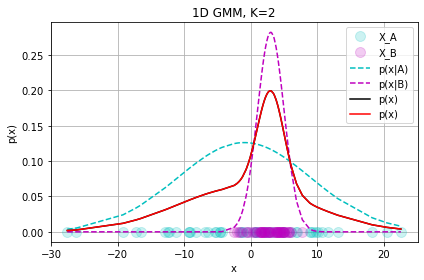

In [93]:
# Shape parameters for 2 gaussian distributions, A and B
mu_A = -1
mu_B = 3
std_A = 10
std_B = 2
var_A = std_A**2
var_B = std_B**2

# Generate random dataset from 2 gaussian distributions
N_A = 50
N_B = 50
N = N_A + N_B
M = 1
X_A = np.random.normal( mu_A, std_A, (N_A,M))
X_B = np.random.normal( mu_B, std_B, (N_B,M))
X = np.vstack( (X_A, X_B) )
in_A_true = np.where( np.vstack((np.ones((N_A,1)), np.zeros((N_B,1)))), True, False )

# Sorting X means that we can make a line plot of p(X) without lots of 
# criss-crossing across the graph area 
sorted_order = np.argsort( X, axis=0 ).flatten()
X = X[sorted_order,0]
in_A_true = in_A_true[sorted_order,0]

# Visualize the raw data
fig, ax = plt.subplots()
ax.set_title("1D GMM, K=2")
ax.set_xlabel("x")
ax.set_ylabel("p(x)")
ax.grid(True)
ax.plot( X_A, np.zeros((N_A, 1)), 'oc', markersize=10, alpha=0.2, label="X_A")
ax.plot( X_B, np.zeros((N_B, 1)), 'om', markersize=10, alpha=0.2, label="X_B")

# TODO: Probability of each sample X[n,:] appearing in each gaussian, A or B
P_A = gauss_1D(X, mu_A, var_A)
P_B = gauss_1D(X, mu_B, var_B)

ax.plot(X, P_A, '--c', label = 'p(x|A)')
ax.plot(X, P_B, '--m', label = 'p(x|B)')

# TODO: Cumulative probability of each sample X[n,:] appearing at all
pi_A = N_A / N
pi_B = N_B / N
P = pi_A*P_A + pi_B*P_B
ax.plot(X, P, '-k', label = 'p(x)')


# Scalable cumulative probability
P_k = np.hstack((P_A.reshape((N,1)), P_B.reshape((N,1))))
mixing = np.array([pi_A, pi_B]).T
P = P_k @ mixing
ax.plot(X, P, '-r', label = 'p(x)')

ax.legend()
fig.tight_layout()
plt.show()

### 2.B: Responsibility

__To do__: 

1. Visualize the __responsibility__ of each distribution for each sample.

2. Maximize the responsibility to determine the cluster assignment for each sample in X.

3. Use histograms to visually compare the original samples in X_A and X_B to their cluster assignments. 

4. How many samples were swapped into the "wrong" cluster? What is the success rate of our cluster assignment strategy?

>> *Because clustering is unsupervised, we usually won't know which samples have been clustered incorrectly. But this is a useful teaching exercise :)*

Some helpful equations:

>> __responsibility__ (slides 50 & 52): $\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \sigma_k)}{\Sigma_j \pi_j \mathcal{N}(x_n | \mu_j, \sigma_j)}$ . This is also called the __posterior probability__, since it represents how likely we think it is to observe a sample in cluster $k$ after knowing that sample's coordinates, $x_n$.

>> __`np.where()`__ can help you vectorize the process of deciding which samples should be in cluster A: `in_A = np.where( gamma_A > gamma_B, True, False )`

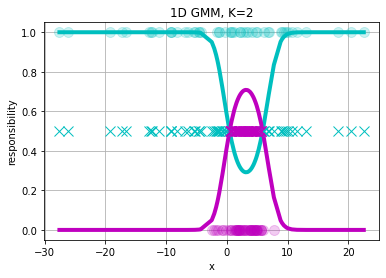

In [94]:
# TODO: Responsibility of each gaussian for each sample
gamma_A = pi_A * P_A / P
gamma_B = pi_B * P_B / P


# Visualize the raw data
fig, ax = plt.subplots()
ax.set_title("1D GMM, K=2")
ax.set_xlabel("x")
ax.set_ylabel("responsibility")
ax.grid(True)
ax.plot( X_A, np.ones((N_A, 1)), 'oc', markersize=10, alpha=0.2, label="X_A")
ax.plot( X_B, np.zeros((N_B, 1)), 'om', markersize=10, alpha=0.2, label="X_B")

# TODO: Visualize the responsibility
ax.plot(X, gamma_A, '-c', linewidth = 4, label = 'gamma_A')
ax.plot(X, gamma_B, '-m', linewidth = 4, label = 'gamma_B')


# TODO: Assign each sample to the cluster with maximum responsibility for that sample
in_A_observed = gamma_A > gamma_B
in_B_observed = ~in_A_observed
ax.plot(X[in_A_observed], 0.5 + np.zeros(X[in_A_observed].shape), 'cx', markersize = 10, label = 'assigned to A')
ax.plot(X[in_B_observed], 0.5 + np.zeros(X[in_B_observed].shape), 'mx', markersize = 10, label = 'assigned to B')


# TODO: Visualize cluster assignments with a histogram
 


# TODO: Visualize original distributions with a histogram




# TODO: What is the successs rate of our cluster assignment strategy?



plt.show()